## Evaluation

During the modeling phase, many models were developed for our business goal. At this stage, the success of these developed models will be compared and inferences will be made according to the criteria determined in our business target.

In [121]:
import pandas as pd
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing import image
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [122]:
test = pd.read_csv("../data/test.csv")

In [123]:
test.shape

(2003, 11)

In [125]:
def predict_test(model, df):
    predictions = []
    for index, row in df.iterrows():
        img = image.load_img(row["image_path"], target_size=(224, 224))
        img = image.img_to_array(img)
        img /= 255.0 # images are scaled in training
        img = np.expand_dims(img, axis=0)
        predict = model.predict(img)
        clasess = np.argmax(predict)
        predictions.append(clasess)
    return predictions

In [135]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


## Models Training

In [173]:
models = [
    {"name": "Custom CNN", "acc_plot":"../graphs/cnn_model_accuracy_plot.png", "loss_plot": "../graphs/cnn_model_loss_plot.png", "weight_path": "../data/weights/cnn/model_best.hdf5" },
    {"name": "Resnet50 Transfer Learning", "acc_plot":"../graphs/resnet50_model_accuracy_plot.png", "loss_plot": "../graphs/resnet50_model_loss_plot.png","weight_path": "../data/weights/resnet50/model_best.hdf5" },
    {"name": "Xception Transfer Learning", "acc_plot":"../graphs/xception_model_accuracy_plot.png", "loss_plot": "../graphs/xception_model_loss_plot.png", "weight_path": "../data/weights/xception/model_best.hdf5" },
    {"name": "Inceptionv3 Transfer Learning", "acc_plot":"../graphs/inceptionv3_model_accuracy_plot.png", "loss_plot": "../graphs/inceptionv3_model_loss_plot.png", "weight_path": "../data/weights/inceptionv3/model_best.hdf5" },
    {"name": "Resnet50 Transfer Learning Fine Tuning", "acc_plot":"../graphs/resnet50_ft_model_accuracy_plot.png", "loss_plot": "../graphs/resnet50_ft_model_loss_plot.png", "weight_path": "../data/weights/resnet50_ft/model_best.hdf5" },
    {"name": "Xception Transfer Learning Fine Tuning", "acc_plot":"../graphs/xception_ft_model_accuracy_plot.png", "loss_plot": "../graphs/xception_ft_model_loss_plot.png", "weight_path": "../data/weights/xception_ft/model_best.hdf5" },
    {"name": "Inceptionv3 Transfer Learning Fine Tuning", "acc_plot":"../graphs/inceptionv3_ft_model_accuracy_plot.png", "loss_plot": "../graphs/inceptionv3_ft_model_loss_plot.png", "weight_path": "../data/weights/inceptionv3_ft/model_best.hdf5" }
]

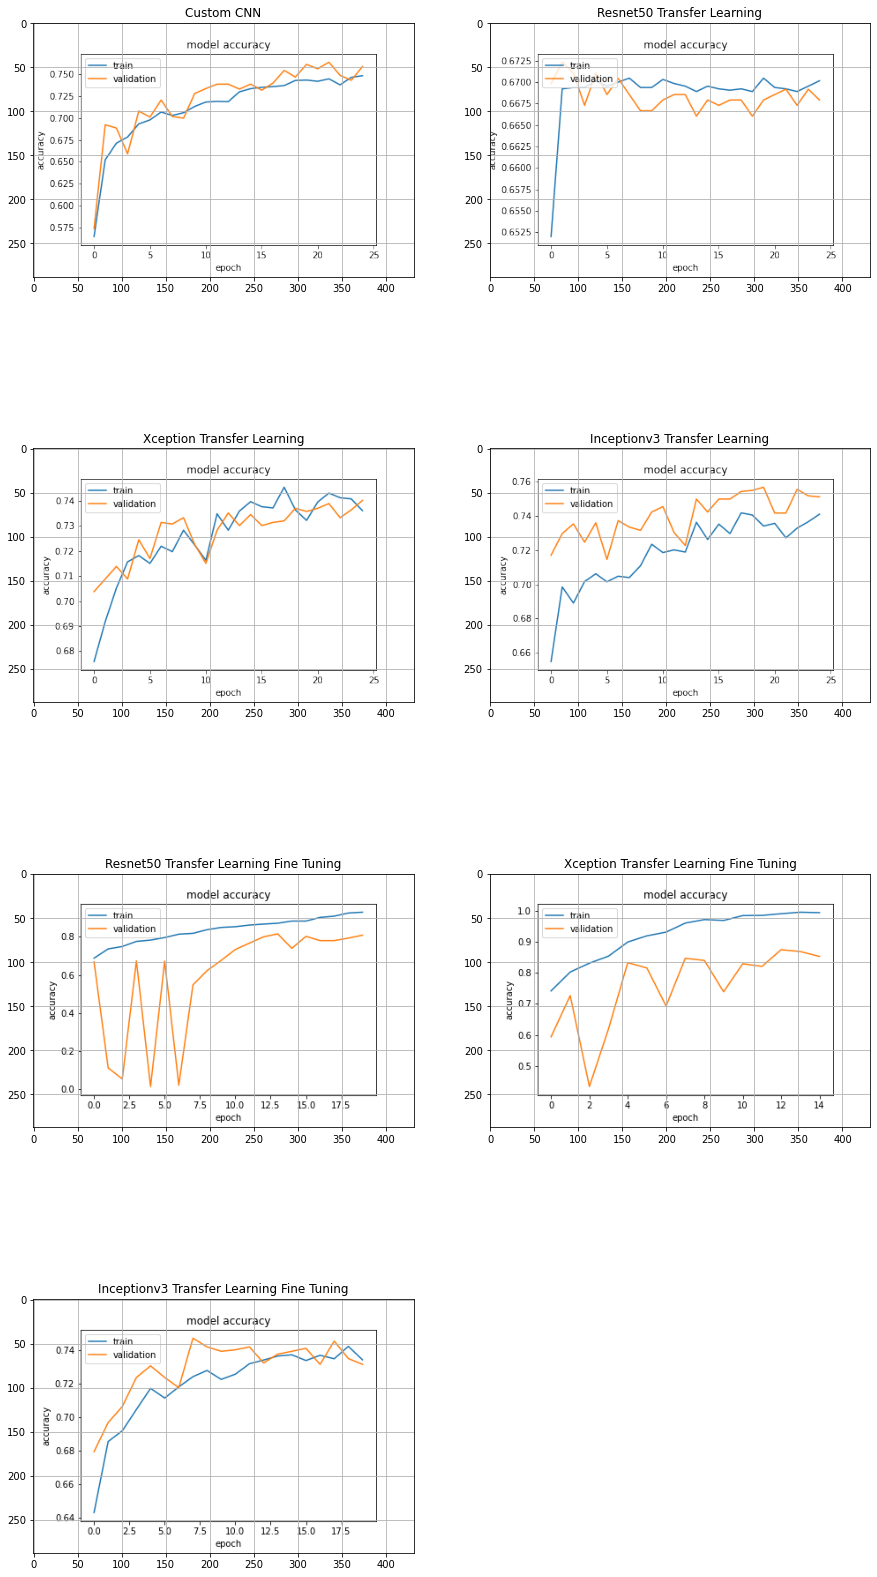

In [174]:
fig = plt.figure(figsize=(15, 30))
columns = 2
rows = 4
for i in range(1, len(models) +1):
    img = Image.open(models[i-1]["acc_plot"]) # read an image
    fig.add_subplot(rows, columns, i)
    plt.title(models[i-1]["name"])
    plt.imshow(img)
    plt.grid(None) # remove grid

plt.savefig('../graphs/model_accuracy_compare.png')
plt.show()

- The accuracy rate of our **custom cnn model** is approximately 75%. There is not much difference between the validation score and the training score, and there is no overfitting.
-  The **Resnet50** architecture we use for transfer learning, could not close the success of our custom cnn architecture. The accuracy rate hovers around 67%. Deep fluctuations occurred in the first epochs of fine tuning. In the next epochs, the rates got closer and the training accuracy reached 93%.
- The success rate of the **Inceptionv3** architecture has increased to approximately 75%. There is an average of about 2% difference with the validation score. In Fine Tuning, this difference is greatly reduced.
- The accuracy of the **Xception** architecture is around 74%. There is a very small difference between the validation score and the training score. In fine tuning, the training score increased to 99% and the validation score to 85%. An overfitting has occurred in model training. However, when the validation score is considered, its success is quite high compared to other models.

### Predict Test Data Set

In [177]:
df_result = pd.DataFrame(columns=['model_name', 'phase', 'accuracy_score'])

In [132]:
# it will take time
predictions = []

for model in models:
    mdl  = load_model(model["weight_path"])
    predict = predict_test(mdl,test)
    predictions.append(predict)
    

In [178]:
model_training_scores= [
    {"model_name": models[0]["name"], "phase": "training", "accuracy_score": 0.7487 },
    {"model_name": models[0]["name"], "phase": "validation", "accuracy_score": 0.7434 },
    {"model_name": models[1]["name"], "phase": "training", "accuracy_score": 0.6695 },
    {"model_name": models[1]["name"], "phase": "validation", "accuracy_score": 0.67233 },
    {"model_name": models[2]["name"], "phase": "training", "accuracy_score": 0.7409 },
    {"model_name": models[2]["name"], "phase": "validation", "accuracy_score": 0.7365 },
    {"model_name": models[3]["name"], "phase": "training", "accuracy_score": 0.7409 },
    {"model_name": models[3]["name"], "phase": "validation", "accuracy_score": 0.7509 },
    {"model_name": models[4]["name"], "phase": "training", "accuracy_score": 0.9300 },
    {"model_name": models[4]["name"], "phase": "validation", "accuracy_score": 0.81597 },
    {"model_name": models[5]["name"], "phase": "training", "accuracy_score": 0.9898 },
    {"model_name": models[5]["name"], "phase": "validation", "accuracy_score": 0.87413 },
    {"model_name": models[6]["name"], "phase": "training", "accuracy_score": 0.7345 },
    {"model_name": models[6]["name"], "phase": "validation", "accuracy_score": 0.74740 },
]

In [179]:
for i in model_training_scores:
        df_result = df_result.append(i, ignore_index= True)
    
for i, prediction in enumerate(predictions):
    df_result = df_result.append({
        'model_name': models[i]["name"],
        "phase": "test",
        "accuracy_score": accuracy_score(prediction, test["lession_type_id"])
    }, ignore_index= True)

## Plot Test Score

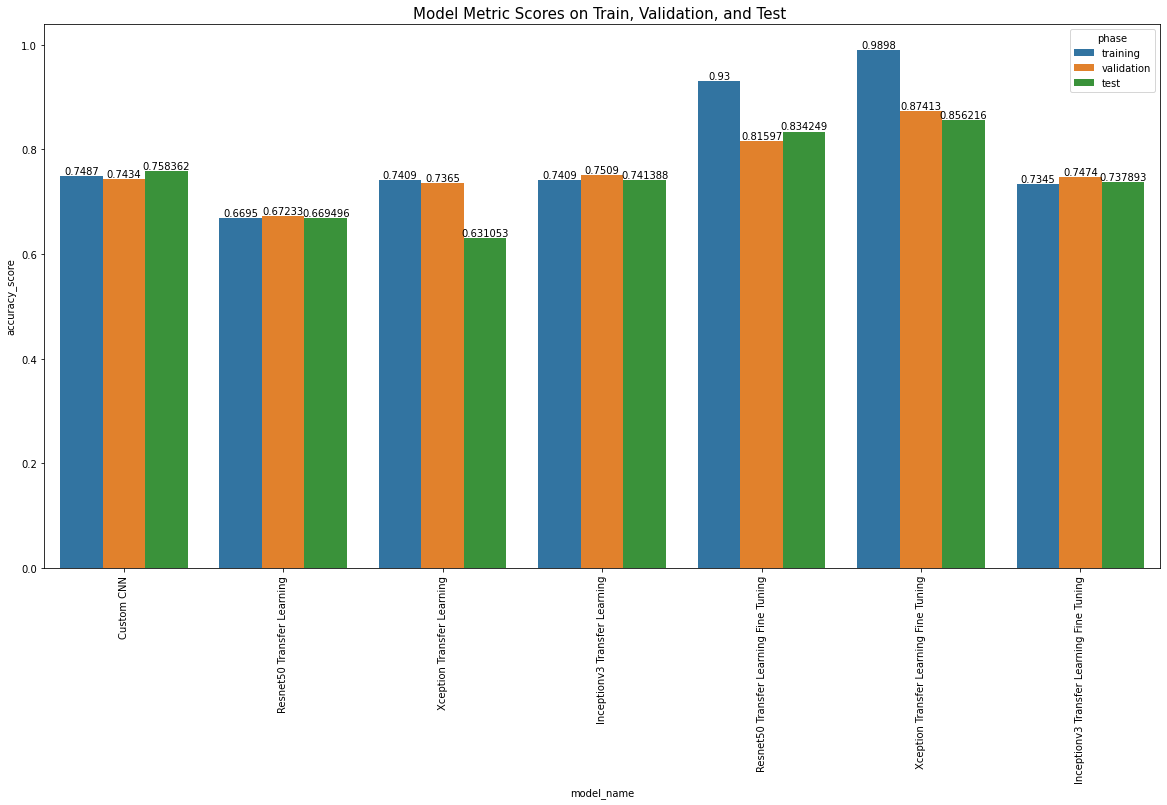

In [182]:
plt.figure(figsize=(20,10))
plt.title('Model Metric Scores on Train, Validation, and Test ',fontsize = 15)
plt.xticks(rotation=90)
ax = sns.barplot(x='model_name', y="accuracy_score", hue='phase',data=df_result)
for container in ax.containers:
    ax.bar_label(container)
plt.savefig('../graphs/model_scores.png')

The graph above shows the success of the trained models on the training, validation,and test data. Accuracy metric value were calculated for each model. First of all, The success rate of the custom cnn model in the test set is slightly above the training and validation score. According to the scores, 2 models stand out; fine-tuned **Xception and Resnet50**. 2 models were overfitted during the training phase, but their success on validation and test data is above the success of other models. When the 2 models are compared to each other, the success of the Xception model on both validation and test set is higher than the Resnet50 model metrics.

### Confusion Matrix

In [ ]:
The prediction value and true value of all models on the test data are plotted through the confusion matrix.

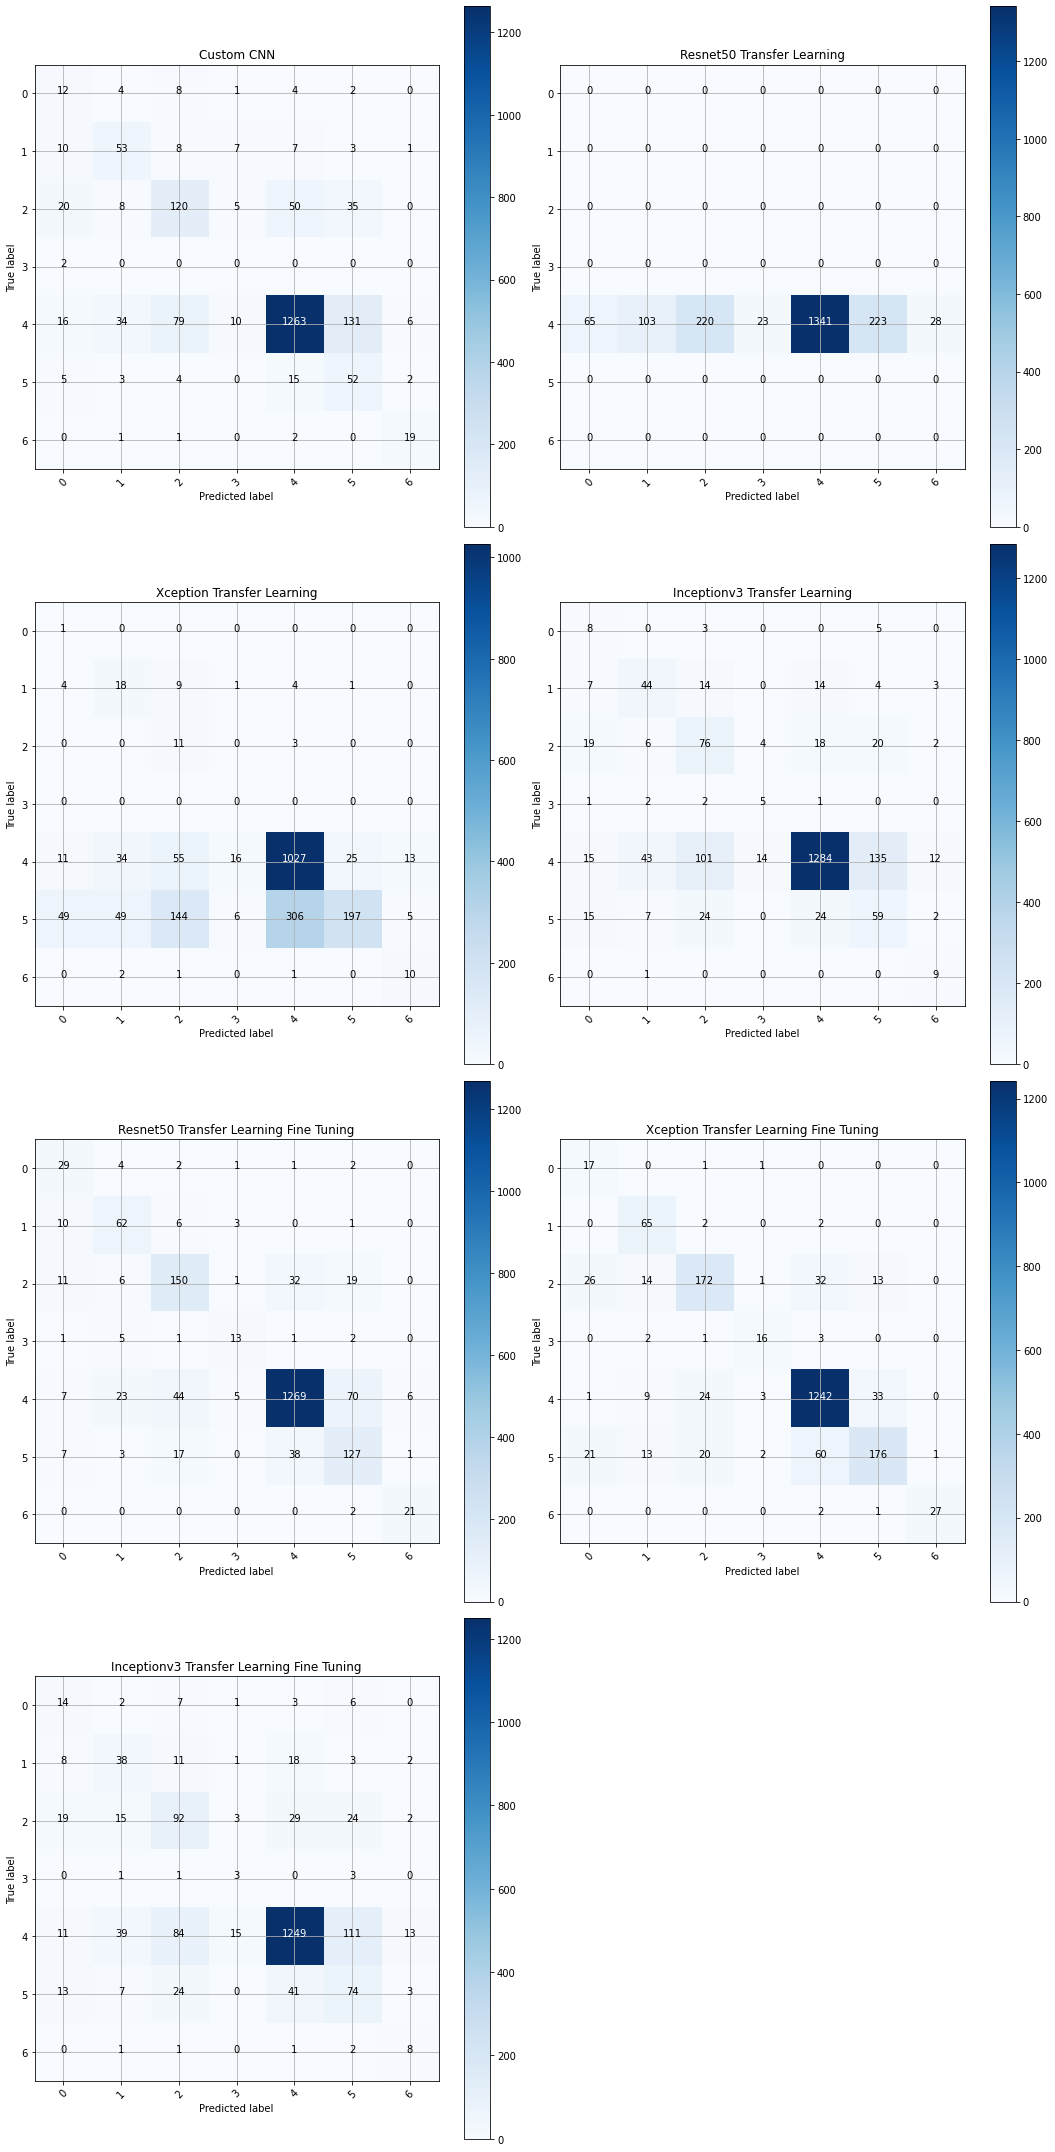

In [142]:
fig = plt.figure(figsize=(15, 30))
columns = 2
rows = 4
for i in range(1, len(models) +1):
    cm = confusion_matrix(predictions[i-1],test["lession_type_id"])
    fig.add_subplot(rows, columns, i)
    plot_confusion_matrix(cm,title=models[i-1]["name"], classes = range(7))
    plt.grid(None) # remove grid
    
plt.savefig('../graphs/model_compare_cm.png')
plt.show()